# **[HW7] Practice_5**
1. Install packages
2. Geometry of eigendecomposition
3. Eigendecomposition

선형대수 실습은, exercise 혹은 coding 문제풀이에 집중하기 보다는, 수업시간에 배웠던 개념들을 visualize 하면서 이를 폭넓게 이해하는 데에 초점을 맞추고 있습니다. 실습에서 사용한 예시 외에도, 다양한 matrix들을 visualize 하면서 개념을 익혀보시기 바랍니다.

# 1. Install packages

> 필요한 package를 설치하고 import합니다

In [1]:
# visualization을 위한 helper code입니다.
from urllib.request import urlretrieve
URL = 'https://go.gwu.edu/engcomp4plot'
urlretrieve(URL, 'plot_helper.py')

import sys
sys.path.append('../scripts/')

# 다음 세 custom function (1)plot_vector, (2)plot_linear_transformation, (3) plot_linear_transformations
# 을 사용할 것입니다.
from plot_helper import *

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import scipy.linalg
import sympy as sy

sy.init_printing() 
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

# 2. Geometry of eigendecomposition

> Eigendecomposition은 선형대수에서 가장 중요한 주제 중 하나입니다. 여러 행렬들의 eigenvector들을 구하고 이를 시각화하면서, 해당 성질들을 이해해보겠습니다.



## Eigenvectors of $A = \begin{bmatrix} 2&1 \\ 1&2 \end{bmatrix}$

> 다음과 같은 행렬 $A = \begin{bmatrix} 2&1 \\ 1&2 \end{bmatrix}$로 표현되는 linear transformation을 생각해봅시다. 아래 plot_linear_transformation(A)는 $\begin{bmatrix}1\\0\end{bmatrix}, \begin{bmatrix}0\\1\end{bmatrix}$이 $A$에 의해 transform 되는 과정을 visualize하는 custom 함수입니다.


[[2 1]
 [1 2]]


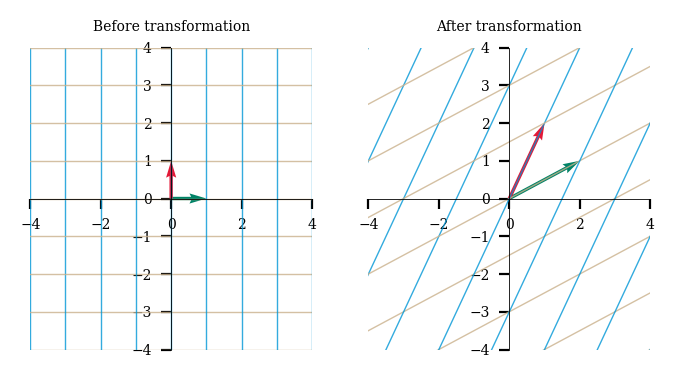

In [3]:
A = np.array([[2,1], [1,2]])
print(A)
plot_linear_transformation(A)

> $A$는 $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ 을 $\begin{bmatrix} 2 \\ 1 \end{bmatrix}$로, $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$을 $\begin{bmatrix} 1 \\ 2 \end{bmatrix}$로 옮기는 linear transformation입니다. $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$, $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$ 외에 다른 vector들은 어떻게 옮겨지는 지 visualize 해봅시다.

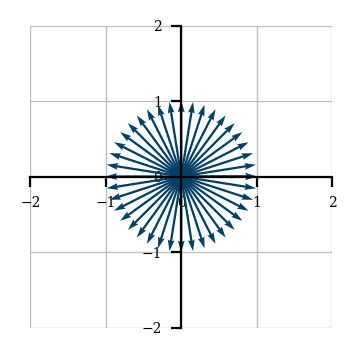

In [4]:
# 길이(norm)가 1인 vector들
alpha = np.linspace(0, 2*np.pi, 41)  # x축과의 각도 (0~2pi)
vectors = list(zip(np.cos(alpha), np.sin(alpha)))
vectors = np.array(vectors)

newvectors = A @ vectors.T
newvectors = newvectors.T

plot_vector(vectors)  # plot_vector는 주어진 vector들을 plot하는 custom function 입니다.

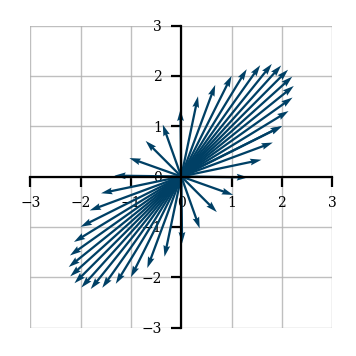

In [5]:
plot_vector(newvectors)

> 위 $A$는 원을 타원으로 만드는 linear transformation임을 확인할 수 있습니다. 이 타원의 semi major axis (장축의 절반), semi minor axis (단축의 절반)을 찾기 위해선, transform된 newvectors의 길이가 가장 길고 짧은 두 vector를 찾으면 됩니다.

In [6]:
lengths = np.linalg.norm(newvectors, axis=1)  # newvectos 각각의 norm

In [7]:
semi_major_index = np.argmax(lengths)  # norm이 가장 긴 것이 타원의 장축
semi_major_vector = newvectors[semi_major_index]
semi_major_length = lengths[semi_major_index]

print(semi_major_vector)  # 장축 vector
print(semi_major_length)

[2.121 2.121]
3.0000000000000004


In [8]:
semi_minor_index = np.argmin(lengths)  # norm이 가장 짧은 것이 타원의 장축
semi_minor_vector = newvectors[semi_minor_index]
semi_minor_length = lengths[semi_minor_index]

print(semi_minor_vector)  # 단축 vector
print(semi_minor_length)

[-0.707  0.707]
1.0


> 장축은 $y=x$ 위에 있는 vector, 즉 x축과 45도를 이루는 vector임을 알 수 있습니다. 단축은 $y=-x$ 위에 있는 vector, 즉 x축과 $-45(=\pi/4)$도를 이루는 vector임을 알 수 있습니다. 이 두 vector $\begin{bmatrix} -2.121 \\ -2.121 \end{bmatrix}$, $\begin{bmatrix} -0.707 \\ 0.707 \end{bmatrix}$은 원래 원의 어느 vector가 linear transform된 것일까요? 


> 이를 구하기 위해 $A^{-1}$을 곱해서, 원래 vector를 구해봅시다.

In [9]:
A_inv = np.linalg.inv(A)
v1 = A_inv @ semi_major_vector
v2 = A_inv @ semi_minor_vector

print(v1)  # v1 -> A -> 장축
print(v2)  # v2 -> A -> 단축

[0.707 0.707]
[-0.707  0.707]


> $v_1$과 semi major vector, 그리고 $v_2$와 semi minor vector은 각각 방향이 같습니다 ($v_1$과 semi major vector는 y=x, $v_2$와 semi minor vector는 $y=-x$위에 존재). 즉 $Av_1 = 3v_1, Av_2=1v_2$임을 알 수 있습니다. 따라서, 위 $A$는 원을 타원으로 바꾸는 matrix이며, 이때 타원의 장축, 단축이 각각 eigenvector가 됨을 알 수 있습니다. \\





**(주의) 이는 모든 타원에 대해서 성립하는 것이 아닙니다. $A$가 symmetric matrix라는 점이 중요한데, 실습 마지막 부분에서 더 자세히 알아보겠습니다.**

## Scaling과 Rotation으로 A 만들기



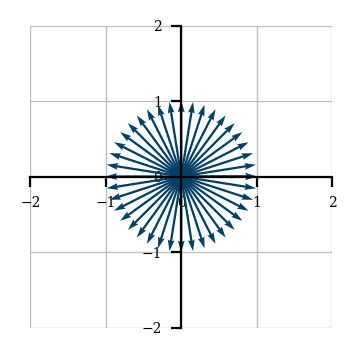

In [10]:
plot_vector(vectors)

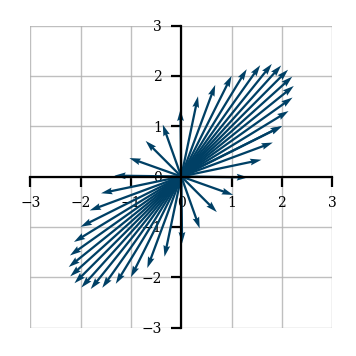

In [11]:
plot_vector(newvectors)

> $A$로 만들어진 타원(newvectors)을 보면, scaling과 rotation의 조합으로 만들 수 있는 것처럼 보입니다. 예를 들면, 반지름이 1인 원(vectors)을 (1) 가로로 3배(장축 방향의 eigenvalue가 3이니까) 늘린 다음 (i.e., y축 성분은 그냥 놔두고, x축 성분을 3배), (2) 시계 반대방향으로 45를 돌린다면 위의 타원을 만들 수 있지 않을까요? 한번 이를 visualize 해봅시다.

### Exercise

In [15]:
S = np.array([[3,0],[0,1]])
ellipse = S@vectors.T
ellipse = ellipse.T

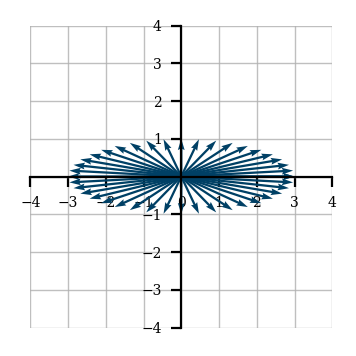

In [16]:
# 정답 plot 예시
plot_vector(ellipse)

> 이제 이 가로로 3배 늘려진 ellipse를 시계 반대방향으로 45도 돌려봅시다. Rotation matrix는 $\mathbf{i}$는 $(\cos\theta, \sin\theta)$로 옮기고, $\mathbf{j}$는 $(-\sin\theta, \cos\theta)$로 옮기는 matrix입니다. 

<center>
<img src="https://nbviewer.jupyter.org/github/engineersCode/EngComp4_landlinear/blob/master/images/rotation.png
"> <figcaption> 출처: Ref. [1]</figcaption>
</center>


$$R = \begin{bmatrix} \cos{\theta} & -\sin{\theta} \\ \sin{\theta} & \cos{\theta} \end{bmatrix}$$

> 이제 위의 ellipse를 $R$을 통해 45도 회전시켜보도록 하겠습니다.

### Exercise

In [21]:
theta = np.pi/4 # TODO
R = np.array([[np.cos(theta), - np.sin(theta)],[np.sin(theta), np.cos(theta)]]) # TODO: 시계방향으로 45도 회전시키는 matrix

rotated_ellipse = R @ ellipse.T
rotated_ellipse = rotated_ellipse.T
# TODO

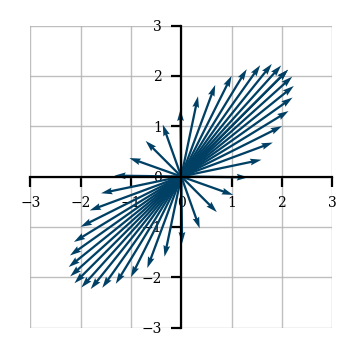

In [22]:
# 정답 plot 예시
plot_vector(rotated_ellipse)

> 위의 rotated_ellipse는 처음에 $A$에 의해 변환된 아래 그림과 겉으로 보기에 같아 보입니다.

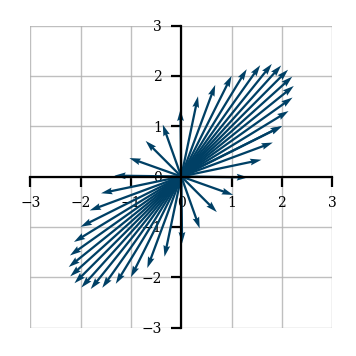

In [23]:
plot_vector(newvectors)

> 즉, $R$과 $S$의 조합으로 A를 만드는 데 성공한 것처럼 보입니다. 하지만 vector 하나 하나를 transformation 시켜보면, 저 $R$과 $S$의 조합은 사실 A가 아님을 알 수 있습니다.

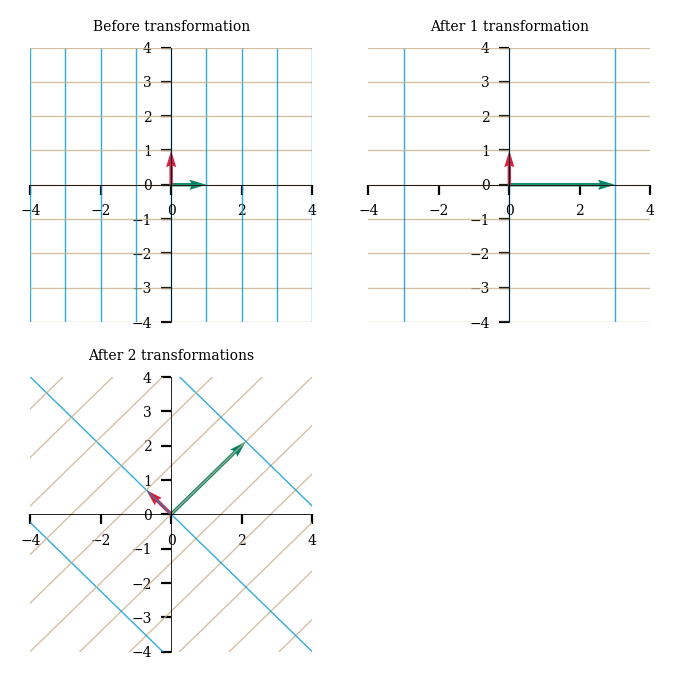

In [24]:
plot_linear_transformations(S,R)

> 위에서 $v_1$은 matrix $A$의 eigenvector임을 알 수 있었습니다 ($Av_1 = 3v_1$). 하지만, 위 그림에선 변환 전 (Before transformation)의 초록색 vector $\mathbf{i}$가, 변환 후 (After 2 transformations)의 초록색 vector $\begin{bmatrix} \alpha \\ \alpha \end{bmatrix}$가 됨을 알 수 있습니다 ($\alpha$는 상수). 이 말은, $v_1$는 $S$@$R$의 eigenvector가 아니라는 뜻입니다. vector의 방향이 바뀌기 때문입니다.

$$A\begin{bmatrix} \alpha \\ \alpha \end{bmatrix} = 3 \begin{bmatrix} \alpha \\ \alpha \end{bmatrix} \\
RS\begin{bmatrix} \alpha \\ \alpha \end{bmatrix} \neq 3\begin{bmatrix} \alpha \\ \alpha \end{bmatrix}$$

> 그럼 $v_1$은 실제로 어떻게 바뀌고 있을까요? 

### Exercise

[0.707 0.707]
[1. 2.]


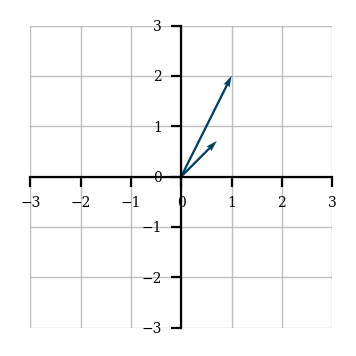

In [32]:
v1 = -v1  # eigenvector에 non-zero 상수를 곱하면 여전히 eigenvector이기 때문에, -1을 곱해줍니다 (좌표를 양수로 만들기 위해)
print(v1)

scaled_v1 = S@v1.T # TODO
rotated_scaled_v1 = R@scaled_v1.T # TODO
plot_vector([v1, rotated_scaled_v1])

print(rotated_scaled_v1)

> 즉 v1이 크기 뿐 아니라 방향마저 바뀌었음을 알 수 있고, 눈으로 언뜻 보기와는 다르게 $A$와 $R$@$S$는 다름을 알 수 있습니다.

$$ A \neq RS$$

## A의 Eigendecomposition

> 그렇다고 해서, rotation과 scaling의 조합으로 $A$를 만들 수 없는 것은 아닙니다. 정답부터 말하자면, (1) rotation을 먼저 시계방향으로 45도로 돌린 후 (2) 이를 scaling하고 (3) 다시 반시계방향으로 45도로 돌리면 정확히 $A$를 만들 수 있습니다.

> 이를 자세히 알아보기전에, 시계방향으로 돌리는 rotation matrix는 $R (=\begin{bmatrix} \cos{\theta} & -\sin{\theta} \\ \sin{\theta} & \cos{\theta} \end{bmatrix})$에서 $\theta$를 $-\theta$로 바꿔주면 됩니다 (위의 rotation matrix에서 설명했던 것의 반대의 작용을 하는 matrix, 즉 $(\cos\theta, \sin\theta)$를  $\mathbf{i}$로 옮기고, $(-\sin\theta, \cos\theta)$를 $\mathbf{j}$로 옮기는 matrix입니다). 즉 $\begin{bmatrix} \cos{\theta} & \sin{\theta} \\ -\sin{\theta} & \cos{\theta} \end{bmatrix}$가 됩니다.

> $\begin{bmatrix} \cos{\theta} & \sin{\theta} \\ -\sin{\theta} & \cos{\theta} \end{bmatrix}$는 반시계방향으로 돌려진 matrix를 원래대로 되돌리는 역할을 하기 때문에, 당연히 $R^{-1}$이 됩니다.

In [33]:
theta_list = [np.pi/8, np.pi/4, np.pi/2, np.pi]

for theta in theta_list:
  R = np.array([[numpy.cos(theta), -numpy.sin(theta)],  # 반시계방향으로 45도 회전하는 matrix
                  [numpy.sin(theta), numpy.cos(theta)]])
  print(R)
  R_inv = np.linalg.inv(R)
  print(R_inv)
  print()

[[ 0.924 -0.383]
 [ 0.383  0.924]]
[[ 0.924  0.383]
 [-0.383  0.924]]

[[ 0.707 -0.707]
 [ 0.707  0.707]]
[[ 0.707  0.707]
 [-0.707  0.707]]

[[ 0. -1.]
 [ 1.  0.]]
[[ 0.  1.]
 [-1.  0.]]

[[-1. -0.]
 [ 0. -1.]]
[[-1.  0.]
 [-0. -1.]]



> 동시에, $\begin{bmatrix} \cos{\theta} & \sin{\theta} \\ -\sin{\theta} & \cos{\theta} \end{bmatrix}$은 $R^{T}$와 같습니다. 왜냐하면 rotation은 orthogonal matrix이기 때문입니다. Orthogonal matrix란 (i) 모든 column의 norm이 1이고 (ii) 모든 column vector가 서로 orthogonal한 matrix를 말합니다. 이에 관한 자세한 설명은 wiki를 참조하시기 바랍니다 (https://en.wikipedia.org/wiki/Orthogonal_matrix). 결론적으로 다음이 성립하게 됩니다.

$$ \text{시계방향으로 } \theta\text{만큼 회전하는 matrix}  = R^{-1} = R^T$$

In [34]:
for theta in theta_list:
  R = np.array([[numpy.cos(theta), -numpy.sin(theta)],  # 반시계방향으로 45도 회전하는 matrix
                  [numpy.sin(theta), numpy.cos(theta)]])
  R_inv = np.linalg.inv(R)
  
  print(R.T)
  print(R_inv)
  print()

[[ 0.924  0.383]
 [-0.383  0.924]]
[[ 0.924  0.383]
 [-0.383  0.924]]

[[ 0.707  0.707]
 [-0.707  0.707]]
[[ 0.707  0.707]
 [-0.707  0.707]]

[[ 0.  1.]
 [-1.  0.]]
[[ 0.  1.]
 [-1.  0.]]

[[-1.  0.]
 [-0. -1.]]
[[-1.  0.]
 [-0. -1.]]



> 다시 원래 내용으로 돌아가서, rotation과 scaling을 조합해 $A$를 만들어 봅시다. 

1. 시계방향으로 45도 회전한다. ($R$)
2. scaling 한다. ($S$)
3. 반시계방향으로 45도 회전해서 원래 방향으로 되돌려준다.. ($R^T$)

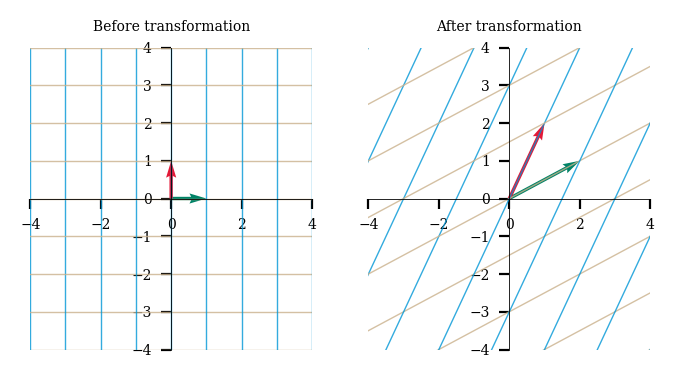

In [35]:
theta = np.pi/4
R = np.array([[np.cos(theta), -np.sin(theta)],  # 반시계방향으로 theta만큼 회전하는 matrix
              [np.sin(theta), np.cos(theta)]])
plot_linear_transformation(R @ S @ R.T)

> 좀 더 자세한 이해를 위해, $R, S, R^T$를 하나씩 visualize 해보겠습니다. $A$의 eigenvector $v_1, v_2$를 세 행렬로 변환시켜봅시다.

In [36]:
v1, v2

(array([0.707, 0.707]), array([-0.707,  0.707]))

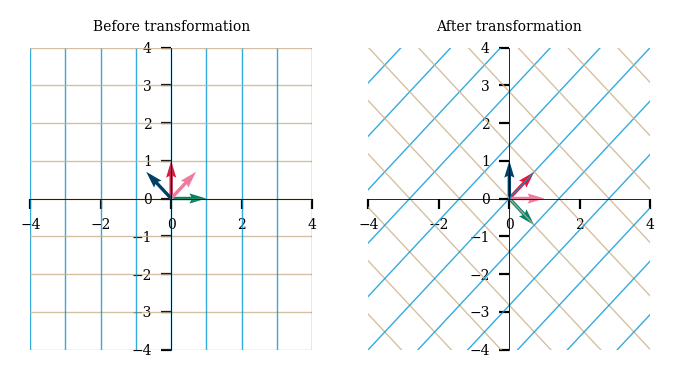

In [37]:
plot_linear_transformation(R.T, v1, v2)

> $y=x, y=-x$ 위에 있는 $v_1$(파랑), $v_2$(분홍)가 시계방향으로 45도 돌아가서 $\begin{bmatrix}1\\0 \end{bmatrix}, \begin{bmatrix}0\\1\end{bmatrix}$이 된 것을 확인할 수 있습니다. 이제 scaling을 적용해 봅시다.

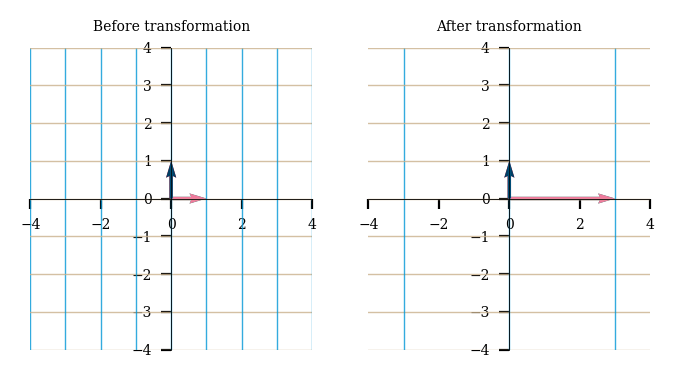

In [38]:
rotated_v1 = R.T @ v1
rotated_v2 = R.T @ v2

scaled_rotated_v1 = S @ rotated_v1
scaled_rotated_v2 = S @ rotated_v2

plot_linear_transformation(S, rotated_v1, rotated_v2)

> $\begin{bmatrix}1\\0 \end{bmatrix}, \begin{bmatrix}0\\1\end{bmatrix}$이 x축 방향으로 3배 길어져서, $\begin{bmatrix}3\\0 \end{bmatrix}, \begin{bmatrix}0\\1\end{bmatrix}$이 된 것을 확인할 수 있습니다. 이제 다시 반시계방향으로 45도를 돌려봅시다.

[2.121 2.121] [-0.707  0.707]


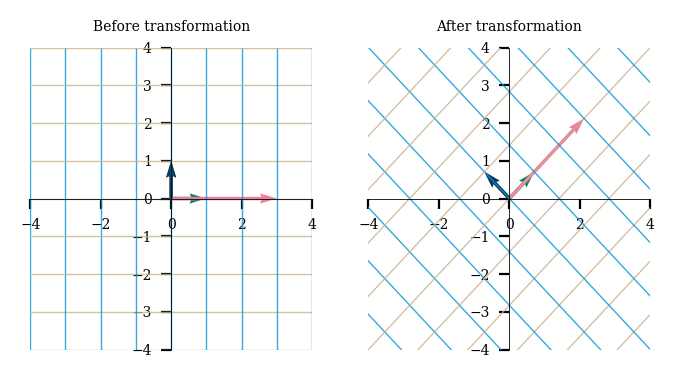

In [39]:
rotated_scaled_rotated_v1 = R@scaled_rotated_v1
rotated_scaled_rotated_v2 = R@scaled_rotated_v2

plot_linear_transformation(R, scaled_rotated_v1, scaled_rotated_v2)
print(rotated_scaled_rotated_v1, rotated_scaled_rotated_v2)

> $\begin{bmatrix}3\\0 \end{bmatrix}, \begin{bmatrix}0\\1\end{bmatrix}$이 반시계 방향으로 돌아가서, $\begin{bmatrix}2.121\\2.121 \end{bmatrix}, \begin{bmatrix}-0.707\\0.707\end{bmatrix}$이 된 것을 확인할 수 있습니다. 즉 $v_1 \rightarrow 3v_1$, $v_2 \rightarrow v_2$이 됩니다. 결론적으로

$$ v_1 \xrightarrow{rotate(-\theta)} \xrightarrow{scaling} \xrightarrow{rotate(\theta)} 3v_1 \\ 
v_2 \xrightarrow{rotate(-\theta)} \xrightarrow{scaling} \xrightarrow{rotate(\theta)} v_2 \\
A = RSR^T$$

> 이 됩니다. $v_1, v_2$가 rotate($-\theta$)로  $\begin{bmatrix}1\\0 \end{bmatrix}, \begin{bmatrix}0\\1\end{bmatrix}$이 된 것에서 짐작할 수 있듯, rotate(-$\theta$)은 eigenvector $v_1, v_2$를 one-hot vector로 만들게 됩니다 ($v_1$은 첫 번째, $v_2$는 두 번째 component만 non-zero). 이는 예전에 배웠던 change of basis와 연관되는데, 이를 이용해 eigendecomposition을 정리해보도록 하겠습니다.

# 3. Eigendecomposition 정리



## Symmetric Matrix

> 잠시 eigendecomposition을 정리하기 전에, symmetric matrix에 대해 알아봅시다. 지금까지 우리는 symmetric matrix인 $A$를 다뤘습니다. Symmetric matrix란 다음의 성질을 만족하는 matrix를 말합니다.

$$ A = A^T  $$

> 내일 강의에서 배우겠지만, symmetric matrix는 여러가지 유용한 성질을 갖고 있습니다. 그 중 하나는, $n \times n$ symmetric matrix의 경우 항상 n개의 orthogonal한 eigenvector를 가질 수 있다는 것입니다.

In [40]:
F = np.random.rand(5,5)
F_symmetric = F + F.T  # A + A^T는 항상 symmetric입니다.
F_symmetric

array([[0.306, 1.318, 0.304, 0.089, 1.245],
       [1.318, 0.074, 0.592, 0.714, 1.362],
       [0.304, 0.592, 1.738, 1.034, 0.54 ],
       [0.089, 0.714, 1.034, 1.569, 0.103],
       [1.245, 1.362, 0.54 , 0.103, 0.462]])

In [41]:
eigenvalues, eigenvectors = np.linalg.eig(F_symmetric)
eigenvectors

array([[ 0.385,  0.402,  0.698,  0.445,  0.068],
       [ 0.461, -0.827,  0.032,  0.271,  0.169],
       [ 0.52 , -0.003,  0.073, -0.451, -0.721],
       [ 0.427,  0.183, -0.036, -0.581,  0.668],
       [ 0.431,  0.347, -0.711,  0.433, -0.033]])

In [42]:
from itertools import combinations
for i,j in combinations(range(5), 2):
  print(eigenvectors[:,i] @ eigenvectors[:,j])

-8.326672684688674e-17
1.1102230246251565e-16
3.3306690738754696e-16
9.71445146547012e-17
4.206704429243757e-16
-8.326672684688674e-17
2.220446049250313e-16
1.5439038936193583e-16
-1.6653345369377348e-16
1.1102230246251565e-16


> 모든 eigenvector의 dot product가 0이 되는 것으로부터, 우리는 symmetric matrix로부터 n개의 orthogonal eigenvector를 얻을 수 있음을 알 수 있습니다.

## Eigendecomposition

> 이번 실습에서 예시로 들었던 $A$는 symmetric matrix입니다. 하지만 (1) matrix $A$를 거쳐서 나온 타원의 장축, 단축이 $A$의 eigenvector가 되는 것, 그리고 (2) 모든 행렬이 rotation과 scaling의 조합으로 쪼갤 수 있는것, 두 성질은 모든 임의의 matrix에 대해 성립하는 것은 아닙니다. 지금부터는 오늘 강의에서 배웠던 것처럼, 보다 일반적으로 eigendecomposition을 유도하도록 하겠습니다.

$$
\begin{align*}
  A \mathbf{v_1} = s_1 \mathbf{v_1} \\
  A \mathbf{v_2} = s_2 \mathbf{v_2}
\end{align*}
$$

> 위 두 식은 matrix의 곱 형태로 나타낼 수 있습니다.

$$ A \begin{bmatrix}
    \mid & \mid \\
    \mathbf{v_1} & \mathbf{v_2}\\
    \mid & \mid
    \end{bmatrix}
    = \begin{bmatrix}
    A\mathbf{v_1} & A\mathbf{v_2}
    \end{bmatrix}
$$

$$ A \begin{bmatrix}
    \mid & \mid \\
    \mathbf{v_1} & \mathbf{v_2} \\
    \mid & \mid \\
    \end{bmatrix}
    = \begin{bmatrix}
    s_1\mathbf{v_1} & s_2\mathbf{v_2}
    \end{bmatrix}
$$

> $\begin{bmatrix} s_1\mathbf{v_1} & s_2\mathbf{v_2} \end{bmatrix}$는 다음과 같이 표현이 가능합니다.


$$ s_1 \mathbf{v_1} = \begin{bmatrix}  \mid & \mid \\  \mathbf{v_1} & \mathbf{v_2} \\ \mid & \mid  \end{bmatrix} \begin{bmatrix} s_1 \\ 0 \end{bmatrix} $$

$$ s_2 \mathbf{v_2} = \begin{bmatrix}  \mid & \mid \\  \mathbf{v_1} & \mathbf{v_2} \\  \mid & \mid \end{bmatrix} \begin{bmatrix} 0 \\ s_2 \end{bmatrix} $$

$$  \begin{bmatrix}s_1\mathbf{v_1} & s_2\mathbf{v_2} \end{bmatrix} = 
\begin{bmatrix}  \mid & \mid \\  \mathbf{v_1} & \mathbf{v_2} \\  \mid & \mid \end{bmatrix} \begin{bmatrix} s_1 & 0 \\ 0 & s_2 \end{bmatrix} $$

> $V$를 eigenvector를 column으로 갖는 matrix $\begin{bmatrix} \mid & \mid \\ \mathbf{v_1} & \mathbf{v_2} \\\mid & \mid \\\end{bmatrix}$라고 하고, $\begin{bmatrix} s_1 & 0 \\ 0 & s_2 \end{bmatrix}$를 D라고 합시다. 그렇다면 결론적으로

$$ AV = VD $$

> 를 유도할 수 있습니다. $V$의 역행렬이 존재한다면,

$$ A = VDV^{-1} \\ D = V^{-1}AV $$

> 이 됩니다. 위와 같은 형태로 A가 decompose 될 수 있으면, A를 diagonalizable이라고 합니다. 사실 우리는 이를 이전 실습에서 본 적이 있습니다. [HW5] Practice_3의 change of basis를 공부할 때, **같은 linear transformation을 새로운 basis에서 계산하려고 할 때**, 정확히 위와 같은 형태로 유도되었습니다. 이 부분이 확실하지 않으시다면, 오늘 강의와 해당 실습을 복습하시기 바랍니다.

> $V$를 change of basis로 본다면, $VDV^{-1}$는 어떤 의미가 될까요? 저번 실습에서 배웠던 것을 떠올려 본다면, (1) $V^{-1}$: standard basis ($\{ \mathbf{i}, \mathbf{j}\}$) 에서 eigenbasis ($\{ \mathbf{v_1}, \mathbf{v_2}\}$)로 basis를 change하고, (2) $D=\begin{bmatrix}s_1&0\\0&s_2\end{bmatrix}:$ $\mathbf{v_1}$ 방향의 성분 (eigenbasis에서의 좌표의 첫 번째 성분)에 $s_1$을 곱해주고, $\mathbf{v_2}$ 방향의 성분 (eigenbasis에서의 좌표의 두 번째 성분)에 $s_2$을 곱해준 다음, (i.e., elementwise scaling) (3) 다시 standard basis로 되돌리는 행위가 됩니다.

$$
  A\, \mathbf{x} = V\, D\, V^{-1}\mathbf{x}
$$

> 위와 같은 형태로 나타낼 수 있는 A, D를 **similar** 하다고 합니다. 즉 어떤 두 matrix가 같은 linear transformation을 나타내는데 basis만 다른 경우에, 두 matrix는 similar한 관계에 있다고 합니다. 

> 이제 non-symmetric matrix인  $B = \begin{bmatrix} 1 & 0 \\ 1 & 3 \end{bmatrix}$의 eigendecomposition을 visualize 해봅시다.

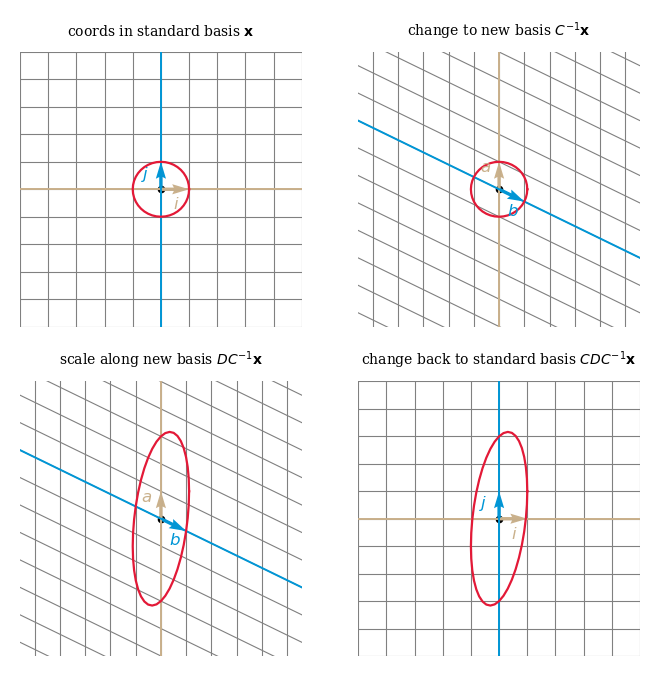

In [43]:
B = np.array([[1,0], [1,3]])
plot_eigen(B)

In [44]:
eigenvalues, eigenvectors = np.linalg.eig(B)
eigenvalues

array([3., 1.])

In [45]:
eigenvectors

array([[ 0.   ,  0.894],
       [ 1.   , -0.447]])

> 갈색, 파랑색 vector는 basis를 나타내고, 왼쪽 위의 빨간색 원은 길이가 1인 vector들의 set입니다 ($x$는 빨간색 원 위의 벡터 하나하나를 나타냅니다).

> 위 설명의 $V$를 $C$라고 하고, $v_1, v_2$는 $\mathbf{a,b}$라고 합시다 ($V=C$, $v_1=\mathbf{a}$, $v_2=\mathbf{b}$).  $C^{-1}x$는 standard basis에서 eigenbasis로 바꾸는 행위입니다. 따라서 basis $\mathbf{i,j}$는 $\mathbf{a,b}$로 바뀌었고, 빨간색 원은 바뀌지 않았습니다. 왜냐하면, change of basis는 vector를 고정시킨 채 축만 바꾸는 것이기 때문입니다.

> $DC^{-1}x$는 $C^{-1}$에 $D$로 scaling한 결과입니다. 축은 바뀌지 않았기 때문에 $\mathbf{a,b}$는 유지되고, 빨간색 원 vector의 $\mathbf{a}$ 성분은 3배, $\mathbf{b}$ 성분은 1배 (eigenvalue) 가 됩니다. 강의에서 배웠듯, matrix 계산에서 scalar 계산으로 바뀌기 때문에 (4번 계산할 것을 2번만 계산해도 됨), computational advantage가 생기게 됩니다.

> $CDC^{-1}x$는 $DC^{-1}x$의 basis를 다시 standard basis로 되돌리는 행위가 됩니다. 마찬가지로 change of basis는 vector를 고정시킨 채 축만 바꾸기 때문에 빨간색 원을 바뀌지 않고, basis만 $\mathbf{a,b}$는 $\mathbf{i,j}$로 바뀌게 됩니다.

> Eigendecomposition은 computational advantage를 비롯해, 다양한 application에 사용됩니다.

# Reference

1. https://github.com/jclosure/EngComp4_landlinear